uint8


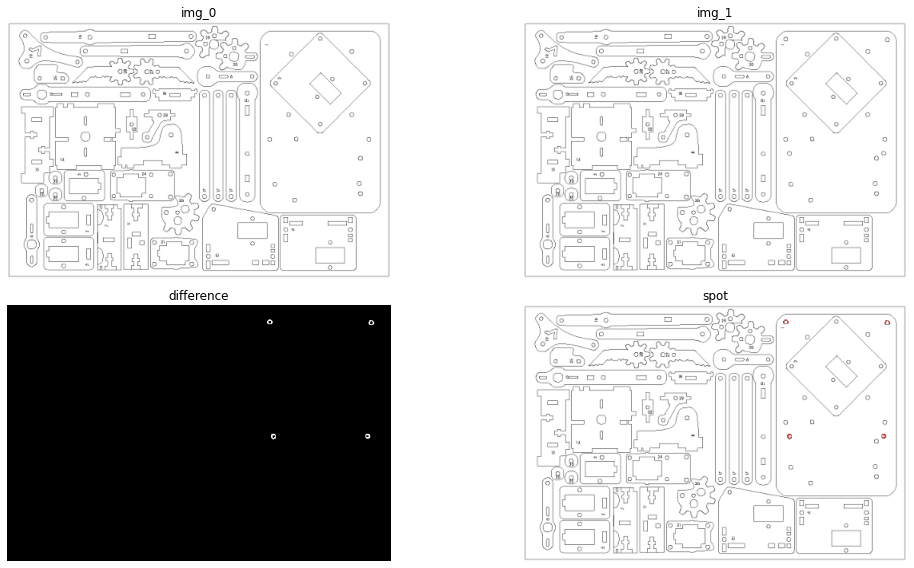

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# path = '/content/drive/My Drive/[10]Lecture/ImageProcessing/Images'
# fstr_0 = os.path.join(path,'robot_arm0.jpg')
# fstr_1 = os.path.join(path,'robot_arm1.jpg')

path = "../../../images"
fstr_0 = os.path.join(path, "robot_arm0.jpg")
fstr_1 = os.path.join(path, "robot_arm1.jpg")

img_0 = cv2.imread(fstr_0, cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread(fstr_1, cv2.IMREAD_GRAYSCALE)
img_0_color = cv2.imread(fstr_0)
img_1_color = cv2.imread(fstr_1)



diff = cv2.absdiff(img_0, img_1)

diff[diff>=10] = 255
print(diff.dtype)
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

spot = cv2.bitwise_xor(img_1_color,diff_red)

imgs = {'img_0':img_0_color, 'img_1':img_1_color, 'difference':diff,'spot':spot}

plt.figure(figsize=[16,8])
for idx, (title, img) in enumerate(imgs.items()):
  plt.subplot(2,2,idx+1)
  plt.title(title)
  plt.axis('off')
  if img.ndim >2: 
    plt.imshow(img[:,:,::-1])
  else:
    plt.imshow(img,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

In [16]:
a = np.arange(9).reshape((3,3))
b = np.array([[255,255,255],[0,0,0],[255,0,255]])

In [17]:
a, b

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[255, 255, 255],
        [  0,   0,   0],
        [255,   0, 255]]))

In [18]:
cv2.bitwise_xor(a, b)

array([[255, 254, 253],
       [  3,   4,   5],
       [249,   7, 247]], dtype=int32)

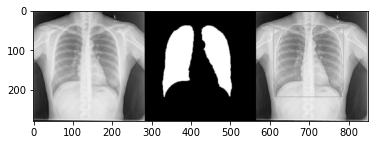

In [20]:
img = cv2.imread(os.path.join(path,'Lung-ROI-segmentation.png'), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, 'gray')

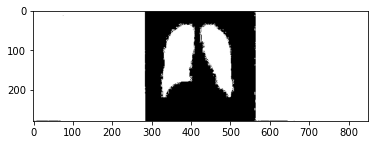

In [39]:
test_img = img.copy()
test_img[test_img>1] = 255
plt.imshow(test_img)

In [47]:
print(np.sum(test_img[2,:,0] == 0))
print(np.sum(test_img[2,:,0] == 255))

281
569


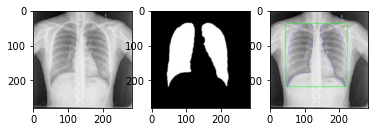

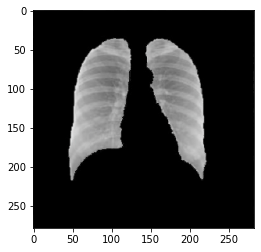

In [64]:
l = np.hsplit(img,(283,566))

plt.subplot(1,3,1)
plt.imshow(l[0])
plt.subplot(1,3,2)
plt.imshow(l[1])
plt.subplot(1,3,3)
plt.imshow(l[2])

plt.figure()
plt.imshow(cv2.bitwise_and(l[0], l[1]))

In [65]:
cv2.imwrite('image/Lung.jpg',l[0])
cv2.imwrite('image/Lung_mask.jpg',l[1])
cv2.imwrite('image/Lung_masked.jpg', cv2.bitwise_and(l[0], l[1]))

True

In [81]:
l[0][0,:3,:]

array([[245, 245, 245],
       [235, 235, 235],
       [191, 191, 191]], dtype=uint8)

In [82]:
l[1][0,:3,:]

array([[160, 160, 161],
       [147, 147, 147],
       [151, 151, 151]], dtype=uint8)

In [83]:
cv2.bitwise_and(l[0][0,:3,:], l[1][0,:3,:])

array([[160, 160, 161],
       [131, 131, 131],
       [151, 151, 151]], dtype=uint8)